**Online news article Dataset-1 - Five classes**

In [1]:
import pandas as pd

Dataset1 = pd.read_csv('Dataset1.csv')
Dataset1

,Text,Category
0,worldcom ex boss launch defenc lawyer defend f...,business
1,german busi confid slide german busi confid fe...,business
2,bbc poll indic econom gloom citizen major nati...,business
3,lifestyl govern mobil choic faster better funk...,tech
4,enron boss payout eighteen former enron direct...,business
...,...,...
1435,doubl evict big brother model capric holbi cit...,entertainment
1436,dj doubl act revamp chart show dj duo jk joel ...,entertainment
1437,weak dollar hit reuter revenu media group reut...,business
1438,appl ipod famili expand market appl expand ipo...,tech


In [2]:
import warnings as DDD
DDD.filterwarnings("ignore")

In [3]:
Dataset1.Category.value_counts()

Category
sport            342
business         335
politics         266
entertainment    263
tech             234
Name: count, dtype: int64

* Five classes in output category

In [4]:
Dataset1_O= Dataset1['Category']
Dataset1_O.shape

(1440,)

### Data Preprocessing

In [5]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

text_data = Dataset1['Text'].values.astype('U')

tokenized_data = [word_tokenize(text.lower()) for text in text_data]

model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = []
for sentence in tokenized_data:
    vec = np.zeros(model.vector_size)  
    num_words = 0
    for word in sentence:
        if word in model.wv:
            vec += model.wv[word]
            num_words += 1
    if num_words > 0:
        vec /= num_words  # Average the vectors
    word_vectors.append(vec)

# Convert word_vectors to array
i_Data = np.array(word_vectors)

print("Shape of word vectors array:", i_Data.shape)


Shape of word vectors array: (1440, 100)


In [6]:
from sklearn.model_selection import train_test_split as LLR

ir_Data1, is_Data1, or_Data1, os_Data1 = LLR(i_Data,Dataset1_O, test_size= 0.4, random_state= 223)
iv_Data1, is_Data1, ov_Data1, os_Data1 = LLR(is_Data1, os_Data1, test_size= 0.5, random_state= 223)

In [7]:
ir_Data1.shape #      train

(864, 100)

In [8]:
iv_Data1.shape #          Validation

(288, 100)

In [9]:
is_Data1.shape #      test

(288, 100)

## **Machine Learning Algorithms**

In [10]:
from sklearn.metrics import classification_report as CR
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import accuracy_score
import time as T
from sklearn.model_selection import GridSearchCV as GS

**Logistic Regression**


In [11]:
print(ir_Data1[:500].shape)
print(or_Data1[:500].shape)


(500, 100)
(500,)


In [12]:
#Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression as LR

ONA_K = {'penalty': ['l1', 'l2', 'elasticnet', None],
            'multi_class': ['auto', 'ovr', 'multinomial']}

ONA_KM = LR(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data1[:500],or_Data1[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'multi_class': 'auto', 'penalty': None}
0.91


In [13]:
Mteric_s = T.time()

Mo_News = LR(**ONA_KM.best_params_)
Mo_News.fit(ir_Data1, or_Data1)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.059975385665893555


LogisticRegression(penalty=None)

               precision    recall  f1-score   support

     business       0.90      0.98      0.94        58
entertainment       0.92      0.89      0.91        66
     politics       0.91      0.89      0.90        54
        sport       0.97      0.97      0.97        63
         tech       0.91      0.87      0.89        47

     accuracy                           0.92       288
    macro avg       0.92      0.92      0.92       288
 weighted avg       0.92      0.92      0.92       288

time-dur-validating = 0.6097314357757568


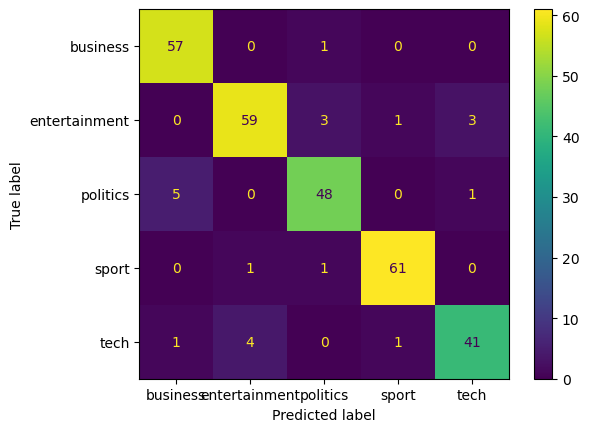

In [14]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(iv_Data1)
print(CR(ov_Data1,pe_Data1))
L = CM(ov_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.94      0.94      0.94        64
entertainment       0.88      0.94      0.91        48
     politics       0.94      0.90      0.92        51
        sport       0.97      0.93      0.95        74
         tech       0.91      0.94      0.92        51

     accuracy                           0.93       288
    macro avg       0.93      0.93      0.93       288
 weighted avg       0.93      0.93      0.93       288

time-dur-testing = 0.07996392250061035


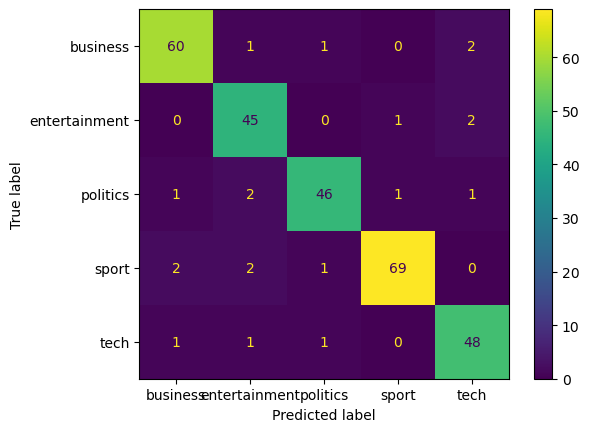

In [15]:
Mteric_s =T.time()

pe_Data1 = Mo_News.predict(is_Data1)
print(CR(os_Data1,pe_Data1))
L = CM(os_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [16]:
#Accuracy of testing data
accuracy_LR = round(accuracy_score(os_Data1,pe_Data1),2)
accuracy_LR

0.93

**SVM**


In [17]:
from sklearn.svm import SVC as svc

ONA_K = {'max_iter': [1, -1, 2, 3],
            'decision_function_shape': ['ovo', 'ovr'],
         'kernel': ['sigmpid', 'poly', 'rbf']}

ONA_KM = svc(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data1[:500],or_Data1[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'decision_function_shape': 'ovo', 'kernel': 'poly', 'max_iter': -1}
0.8540000000000001


In [18]:
Mteric_s = T.time()

Mo_News = svc(**ONA_KM.best_params_)
Mo_News.fit(ir_Data1, or_Data1)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.06996631622314453


SVC(decision_function_shape='ovo', kernel='poly')

               precision    recall  f1-score   support

     business       0.90      0.97      0.93        58
entertainment       0.92      0.85      0.88        66
     politics       0.87      0.87      0.87        54
        sport       0.92      0.95      0.94        63
         tech       0.89      0.87      0.88        47

     accuracy                           0.90       288
    macro avg       0.90      0.90      0.90       288
 weighted avg       0.90      0.90      0.90       288

time-dur-validating = 0.17995095252990723


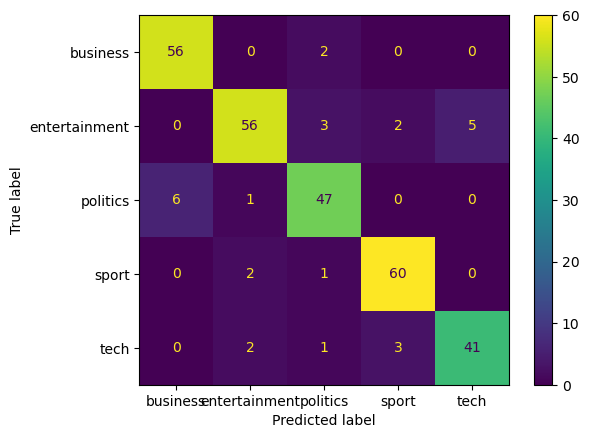

In [19]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(iv_Data1)
print(CR(ov_Data1,pe_Data1))
L = CM(ov_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.91      0.94      0.92        64
entertainment       0.83      0.92      0.87        48
     politics       0.94      0.86      0.90        51
        sport       0.88      0.91      0.89        74
         tech       0.91      0.82      0.87        51

     accuracy                           0.89       288
    macro avg       0.89      0.89      0.89       288
 weighted avg       0.89      0.89      0.89       288

time-dur-testing = 0.07996702194213867


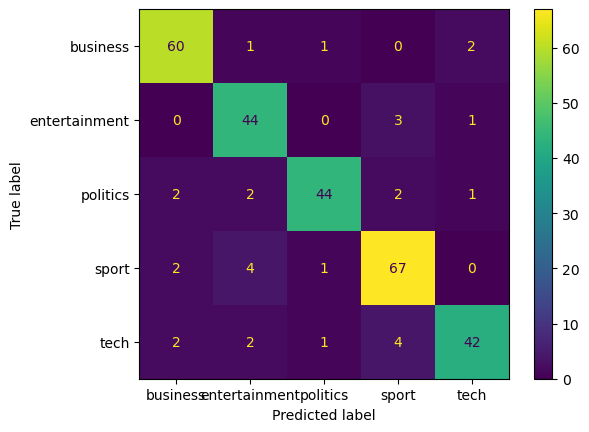

In [20]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(is_Data1)
print(CR(os_Data1,pe_Data1))
L =CM(os_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [21]:
accuracy_SVM = round(accuracy_score(os_Data1,pe_Data1),2)
accuracy_SVM

0.89

**Decision Tree**


In [22]:
from sklearn.tree import DecisionTreeClassifier as DT

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = DT(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data1[:500],or_Data1[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'gini', 'max_features': 'log2'}
0.8360000000000001


In [23]:
Mteric_s = T.time()

Mo_News = DT(**ONA_KM.best_params_)
Mo_News.fit(ir_Data1, or_Data1)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.019992589950561523


DecisionTreeClassifier(max_features='log2')

               precision    recall  f1-score   support

     business       0.82      0.91      0.86        58
entertainment       0.89      0.82      0.85        66
     politics       0.83      0.83      0.83        54
        sport       0.89      0.90      0.90        63
         tech       0.84      0.79      0.81        47

     accuracy                           0.85       288
    macro avg       0.85      0.85      0.85       288
 weighted avg       0.86      0.85      0.85       288

time-dur-validating = 0.0799562931060791


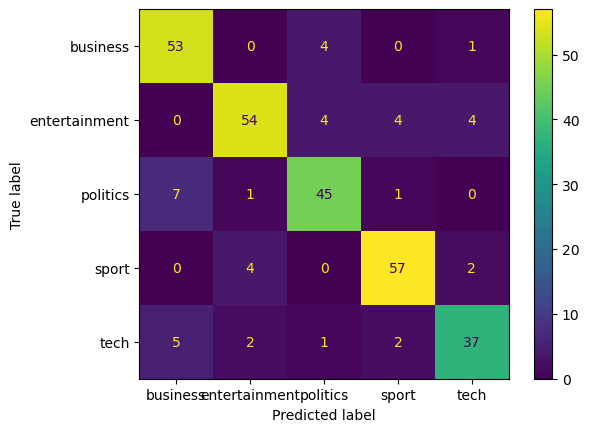

In [24]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(iv_Data1)
print(CR(ov_Data1,pe_Data1))
L = CM(ov_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.86      0.84      0.85        64
entertainment       0.74      0.83      0.78        48
     politics       0.92      0.90      0.91        51
        sport       0.86      0.89      0.87        74
         tech       0.91      0.78      0.84        51

     accuracy                           0.85       288
    macro avg       0.86      0.85      0.85       288
 weighted avg       0.86      0.85      0.85       288

time-dur-testing = 0.07000946998596191


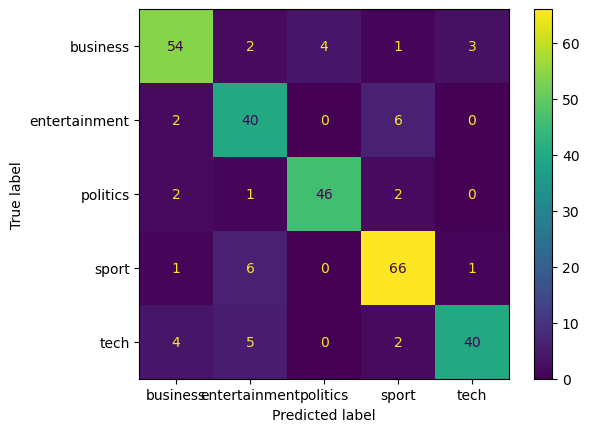

In [25]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(is_Data1)
print(CR(os_Data1,pe_Data1))
L = CM(os_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [26]:
accuracy_DT = round(accuracy_score(os_Data1,pe_Data1),2)
accuracy_DT

0.85

**Random Forest**


In [27]:
from sklearn.ensemble import RandomForestClassifier as RF

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = RF(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data1[:500],or_Data1[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'entropy', 'max_features': 'log2'}
0.916


In [28]:
Mteric_s = T.time()

Mo_News = RF(**ONA_KM.best_params_)
Mo_News.fit(ir_Data1, or_Data1)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 1.1069860458374023


RandomForestClassifier(criterion='entropy', max_features='log2')

               precision    recall  f1-score   support

     business       0.89      0.97      0.93        58
entertainment       0.93      0.83      0.88        66
     politics       0.90      0.85      0.88        54
        sport       0.91      0.98      0.95        63
         tech       0.89      0.89      0.89        47

     accuracy                           0.91       288
    macro avg       0.91      0.91      0.90       288
 weighted avg       0.91      0.91      0.91       288

time-dur-validating = 0.09999227523803711


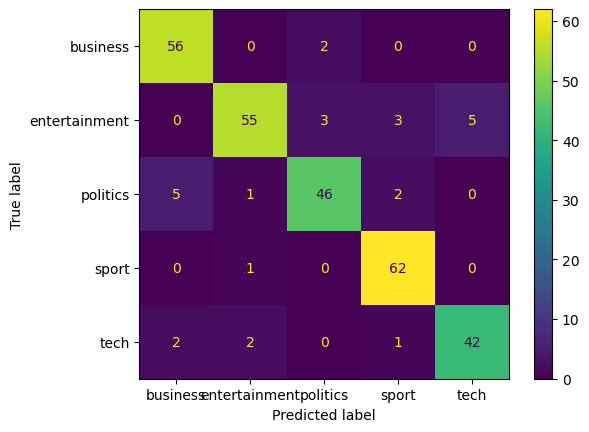

In [29]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(iv_Data1)
print(CR(ov_Data1,pe_Data1))
L =CM(ov_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.24      0.23      0.24        64
entertainment       0.24      0.29      0.26        48
     politics       0.22      0.22      0.22        51
        sport       0.28      0.26      0.27        74
         tech       0.26      0.24      0.24        51

     accuracy                           0.25       288
    macro avg       0.25      0.25      0.25       288
 weighted avg       0.25      0.25      0.25       288

time-dur-testing = 0.07995963096618652


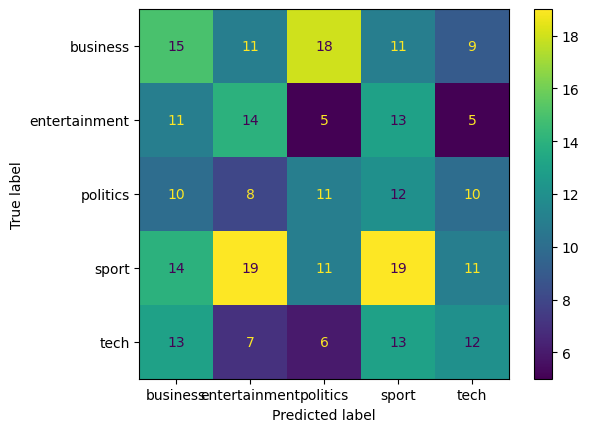

In [30]:
Mteric_s = T.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_Data1)
print(CR(os_Data1,pe_Data1))
L = CM(os_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [31]:
accuracy_RF = round(accuracy_score(os_Data1,pe_Data1),2)
accuracy_RF

0.25

**Gradient Boosting**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier as GB

ONA_K = {'criterion': ['friedman_mse', 'squared_error'],
            'max_features': ['sqrt', 'log2']}

ONA_KM = GB(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data1[:500],or_Data1[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'friedman_mse', 'max_features': 'sqrt'}
0.91


In [33]:
Mteric_s = T.time()

Mo_News = GB(**ONA_KM.best_params_)
Mo_News.fit(ir_Data1, or_Data1)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 5.1958794593811035


GradientBoostingClassifier(max_features='sqrt')

               precision    recall  f1-score   support

     business       0.89      0.98      0.93        58
entertainment       0.93      0.85      0.89        66
     politics       0.92      0.85      0.88        54
        sport       0.93      0.98      0.95        63
         tech       0.89      0.89      0.89        47

     accuracy                           0.91       288
    macro avg       0.91      0.91      0.91       288
 weighted avg       0.91      0.91      0.91       288

time-dur-validating = 0.06001091003417969


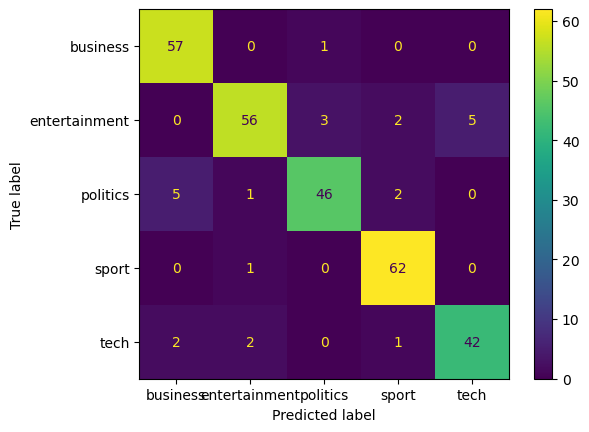

In [34]:
Mteric_s = T.time()

pe_Data1= Mo_News.predict(iv_Data1)
print(CR(ov_Data1,pe_Data1))
L = CM(ov_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.90      0.97      0.93        64
entertainment       0.86      0.90      0.88        48
     politics       0.96      0.84      0.90        51
        sport       0.93      0.92      0.93        74
         tech       0.90      0.90      0.90        51

     accuracy                           0.91       288
    macro avg       0.91      0.91      0.91       288
 weighted avg       0.91      0.91      0.91       288

time-dur-testing = 0.06953120231628418


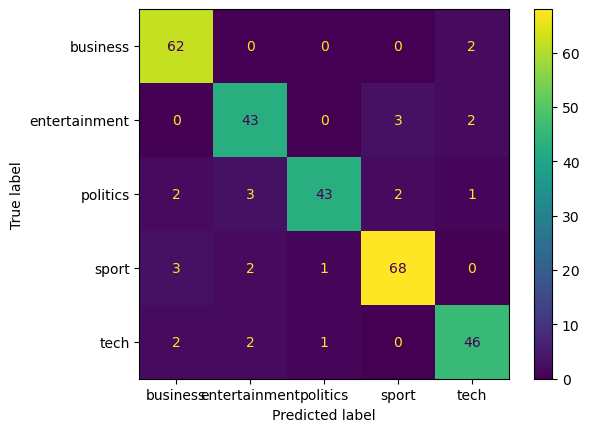

In [35]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(is_Data1)
print(CR(os_Data1,pe_Data1))
L = CM(os_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [36]:
accuracy_GB = round(accuracy_score(os_Data1,pe_Data1),2)
accuracy_GB

0.91

## **Neural Network Algorithms**

**Multi Layer Perceptron**

In [37]:
from sklearn.neural_network import MLPClassifier as MLP

ONA_K = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver': ['adam','lbfgs', 'sgd']}

ONA_KM = MLP(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data1[:500],or_Data1[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'learning_rate': 'constant', 'solver': 'lbfgs'}
0.902


In [38]:
Mteric_s = T.time()

Mo_News = MLP(**ONA_KM.best_params_)
Mo_News.fit(ir_Data1, or_Data1)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.8716399669647217


MLPClassifier(solver='lbfgs')

               precision    recall  f1-score   support

     business       0.89      0.98      0.93        58
entertainment       0.97      0.89      0.93        66
     politics       0.91      0.91      0.91        54
        sport       0.98      0.97      0.98        63
         tech       0.89      0.89      0.89        47

     accuracy                           0.93       288
    macro avg       0.93      0.93      0.93       288
 weighted avg       0.93      0.93      0.93       288

time-dur-validating = 0.07118082046508789


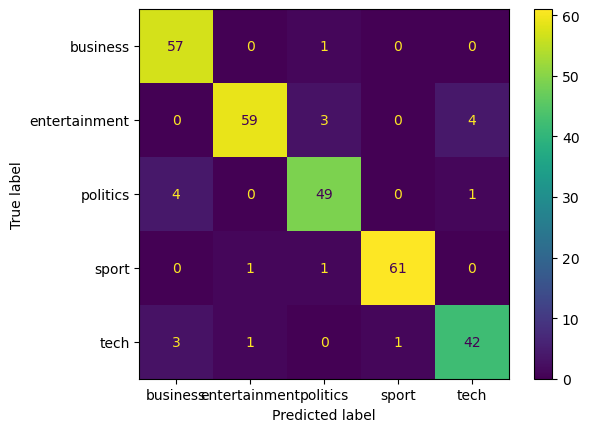

In [39]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(iv_Data1)
print(CR(ov_Data1,pe_Data1))
L = CM(ov_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

               precision    recall  f1-score   support

     business       0.92      0.94      0.93        64
entertainment       0.91      0.88      0.89        48
     politics       0.90      0.88      0.89        51
        sport       0.95      0.93      0.94        74
         tech       0.91      0.96      0.93        51

     accuracy                           0.92       288
    macro avg       0.92      0.92      0.92       288
 weighted avg       0.92      0.92      0.92       288

time-dur-testing = 0.07648515701293945


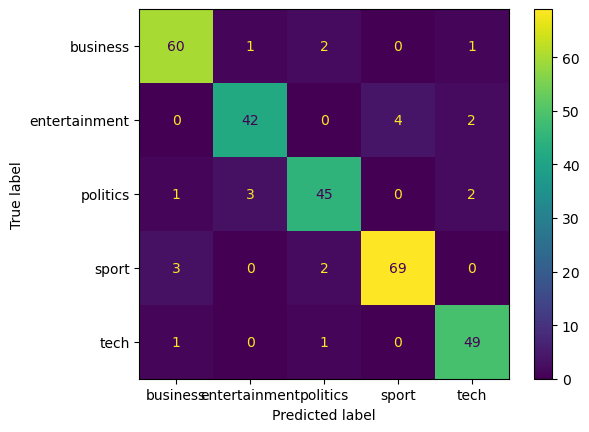

In [40]:
Mteric_s = T.time()

pe_Data1 = Mo_News.predict(is_Data1)
print(CR(os_Data1,pe_Data1))
L = CM(os_Data1,pe_Data1)
D = CMD(confusion_matrix = L, display_labels = ['business','entertainment','politics','sport','tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [41]:
accuracy_MLP = round(accuracy_score(os_Data1,pe_Data1),2)
accuracy_MLP

0.92

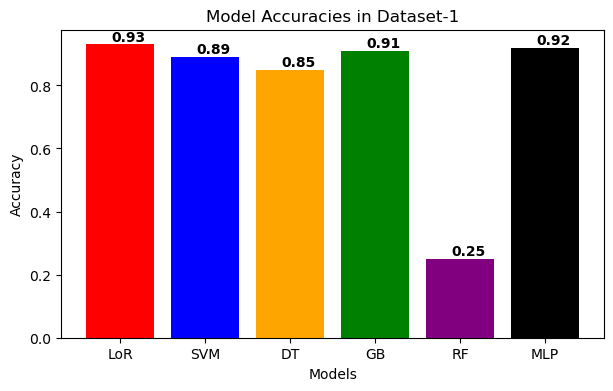

In [43]:
import matplotlib.pyplot as plt

models = ['LoR','SVM','DT','GB','RF', 'MLP']
accuracies = [accuracy_LR,accuracy_SVM,accuracy_DT,accuracy_GB,accuracy_RF,accuracy_MLP]

# set up the bar plot
plt.figure(figsize=(7,4))
plt.bar(models, accuracies, color=['red','blue','orange','green','purple','black'])

# add title and labels
plt.title('Model Accuracies in Dataset-1')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# add the accuracies as text labels on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, v, color='black', fontweight='bold')

# show the plot
plt.show()